# Tarefa 02
Nesta tarefa vocês irão projetar duas arquiteturas de CNN utilizando os conceitos, camadas e técnicas vistas no curso. As redes serão treinadas no dataset CIFAR-10 e depois comparadas. As tarefas são:

**1) Definir as arquiteturas; ----> 0.3 pontos** 

- Quantas [camadas](https://keras.io/layers/core/) ela terá?
- Quais as operações utilizadas (convoluções, pooling, fully-connected)?
- Quais serão os parâmetros de cada camada (número e tamanho dos filtros convolucionais, stride, tamanho do pooling, funções de ativação)?
- Que tipo de [inicialização](https://keras.io/initializers/) de pesos você utilizará?
- Haverá dropout? Qual a taxa de dropout? 
- Haverá [regularização](https://keras.io/regularizers/)? Qual a taxa do regularizador?

**2) Definir como será o treino; ----> 0.25 pontos**
- Número de épocas e tamanho do batch (deixe igual p/ as duas redes);
- [Otimizador](https://keras.io/optimizers/);
- [Função de custo](https://keras.io/losses/);

**3) Classificar o conjunto de teste e comparar os resultados; ----> 0.25 pontos**
- Classificar imagens de teste;
- Comparar acurácias;
- Plotar loss pelo número de épocas no conjunto de treinamento e validação de cada rede. 
    
**4) Escrever um parágrafo com as suas conclusões; ----> 0.2 pontos**

-----

## CIFAR-10
Este conjunto de dados é composto de 60000 imagens coloridas de dimensões 32x32, divididas em 10 classes (com 6000 imagens por classe), sendo 50000 para treinamento e 10000 para teste. As classes do CIFAR-10 são **aviões, automóveis, pássaros, gatos, alces, cachorros, sapos, cavalos, navios, caminhões.**

O código abaixo carrega e transforma os dados de entrada para ficarem prontos para serem treinados/classificados pela sua rede. Os conjuntos de treino, validação e teste estão balanceados, portanto a acurácia já estará normalizada nos métodos do Keras.  

In [1]:
#Imports
import os
import numpy as np
from random import seed
seed(42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger

from keras.datasets import cifar10
from keras.utils import np_utils
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit


#Load data
(trainVal_data, trainVal_label), (X_test, y_test) = cifar10.load_data()

# Caso alguem tenha problemas com o StratifiedShuffleSplit, tente descomentar essa versao
#Split trainVal data into train and val sets (already balanced)
# splitIdx = StratifiedShuffleSplit(trainVal_label, 1, test_size=10000, random_state=0)
# for train_index, val_index in splitIdx:
#     X_train, X_val = trainVal_data[train_index], trainVal_data[val_index]
#     y_train, y_val = trainVal_label[train_index], trainVal_label[val_index]
    

splitIdx = StratifiedShuffleSplit(1, test_size=10000, random_state=0)
for train_index, val_index in splitIdx.split(trainVal_data, trainVal_label):
    X_train, X_val = trainVal_data[train_index], trainVal_data[val_index]
    y_train, y_val = trainVal_label[train_index], trainVal_label[val_index]

    
#Transform data
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_val.shape)
print("Testing matrix shape", X_test.shape)

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Using TensorFlow backend.


Training matrix shape (40000, 32, 32, 3)
Validation matrix shape (10000, 32, 32, 3)
Testing matrix shape (10000, 32, 32, 3)


In [2]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train ---> ", dict(zip(unique, counts)), "\n")

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train.flatten())
train_class_weights = dict(enumerate(class_weights))

Train --->  {0: 4000, 1: 4000, 2: 4000, 3: 4000, 4: 4000, 5: 4000, 6: 4000, 7: 4000, 8: 4000, 9: 4000} 



--------
--------
--------
**A tarefa de vocês começa aqui!!!**

# Definir as duas arquiteturas - [0.3 pontos]
***Não se esqueçam de***:
    - Importar as camadas utilizadas e o tipo do modelo (Sequential);
    - Passar o input_shape na primeira camada da rede;
    - Utilizar ativação `softmax` na última camada densa da rede;

In [3]:
#Imports
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers # other stuff needed ... 
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

nb_classes = 10
nb_epochs = 10


For model 1, we'll define a simple model with:
- 1 Convolutional Layer with 20 filters 5x5
- 1 Pooling Layer
- 1 Flatten Layer
- 1 Dropout Layer (0.25)
- 1 Fully Connected Layer with 10 categories (Output)

In [4]:
# Define 1st architecture
modelOne = Sequential()
# Add the Convolution Layer with 5x5 Kernel and 20 filters
modelOne.add(Conv2D(20, 
                 kernel_size=(5,5),
                 activation='relu',
                 input_shape=(32,32,3)))

# Add pooling layer with kernel 3x3
modelOne.add(MaxPooling2D(pool_size=(3, 3)))

# Flatten
modelOne.add(Flatten())

# Dropout with probability 0.25
modelOne.add(Dropout(0.25))

# FC layer with 10 units and Softmax
modelOne.add(Dense(nb_classes, activation='softmax'))

Second Model will have:
- 1 Convolutional Layer with 20 filters 5x5
- 1 Convolutional Layer with 20 filters 
- 1 Convolutional Layer with 20 filters 
- 1 Pooling Layer
- 1 Flatten Layer
- 1 Dropout Layer (0.25)
- Fully Connected layer with 100 units and ReLU activation
- 1 Fully Connected Layer with 10 categories (Output)

- Data Augmentation

In [5]:
# Define 2nd architecture
modelTwo = Sequential()

# Add the Convolution Layer with 5x5 Kernel and 20 filters
modelTwo.add(Conv2D(20, 
                 kernel_size=(5,5),
                 activation='relu',
                 input_shape=(32,32,3)))

modelTwo.add(Conv2D(20, 
                 kernel_size=(3,3),
                 activation='relu'))

modelTwo.add(Conv2D(10, 
                 kernel_size=(2,2),
                 activation='relu'))

# Add pooling layer with kernel 2x2
modelTwo.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
modelTwo.add(Flatten())

# Dropout with probability 0.25
modelTwo.add(Dropout(0.25))

# Fully Connected layer with 100 units and ReLU activation
modelTwo.add(Dense(100, activation='relu'))

# FC layer with 10 units and Softmax
modelTwo.add(Dense(nb_classes, activation='softmax'))

# Treinamento - [0.25 pontos]
***Não se esqueçam de***:
    - Escolher otimizador e loss;
    - Compilar o modelo;
    - Definir número de épocas, tamanho do batch (utilizar o mesmo para ambas as redes);
    - Passar o conjunto de validação em `validation_data`;

In [6]:
# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', #metric to monitor
                          min_delta=0.0002,  #difference considered as improvement
                          patience=5) #number of epochs with no improvement after which training will be stopped 

callbacks_list = [earlystop]

In [7]:
#Compile first model
sgd = optimizers.SGD(lr=0.01) #lr = learning rate
modelOne.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#Train first CNN
modelOneHistory = modelOne.fit(X_train, Y_train,
          batch_size=128, epochs=nb_epochs, verbose=1,
          class_weight = class_weights,
          validation_data=(X_val, Y_val),
          callbacks=callbacks_list)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 37s 929us/step - loss: 2.2184 - acc: 0.1859 - val_loss: 2.0767 - val_acc: 0.2682
Epoch 2/10
40000/40000 [==============================] - 36s 904us/step - loss: 2.0041 - acc: 0.2844 - val_loss: 1.9076 - val_acc: 0.3424
Epoch 3/10
40000/40000 [==============================] - 36s 907us/step - loss: 1.8842 - acc: 0.3331 - val_loss: 1.8166 - val_acc: 0.3699
Epoch 4/10
40000/40000 [==============================] - 36s 906us/step - loss: 1.8001 - acc: 0.3641 - val_loss: 1.7516 - val_acc: 0.3892
Epoch 5/10
40000/40000 [==============================] - 36s 911us/step - loss: 1.7303 - acc: 0.3852 - val_loss: 1.6762 - val_acc: 0.4179
Epoch 6/10
40000/40000 [==============================] - 36s 902us/step - loss: 1.6716 - acc: 0.4086 - val_loss: 1.6301 - val_acc: 0.4384
Epoch 7/10
40000/40000 [==============================] - 36s 907us/step - loss: 1.6281 - acc: 0.4221 - val_loss: 1.

In [8]:
trainDataGen = ImageDataGenerator(horizontal_flip=True, 
                                  zoom_range=0.01, 
                                  width_shift_range=0.01, 
                                  height_shift_range=0.01)

In [9]:
#Compile second model
adam_optimizer = optimizers.Adam()
modelTwo.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
#Train second CNN
# fits the model on batches with real-time data augmentation:
modelTwoHistory = modelTwo.fit_generator(trainDataGen.flow(X_train, Y_train, batch_size=128), 
                          steps_per_epoch=len(X_train) / 128, epochs=nb_epochs,
                          validation_data=(X_val, Y_val),
                          callbacks=callbacks_list)

Epoch 1/10
313/312 [==============================] - 89s 285ms/step - loss: 1.7131 - acc: 0.3766 - val_loss: 1.4664 - val_acc: 0.4661
Epoch 2/10
313/312 [==============================] - 89s 284ms/step - loss: 1.4475 - acc: 0.4768 - val_loss: 1.3633 - val_acc: 0.5142
Epoch 3/10
313/312 [==============================] - 93s 299ms/step - loss: 1.3469 - acc: 0.5183 - val_loss: 1.3408 - val_acc: 0.5250
Epoch 4/10
313/312 [==============================] - 95s 305ms/step - loss: 1.2775 - acc: 0.5427 - val_loss: 1.1996 - val_acc: 0.5691
Epoch 5/10
313/312 [==============================] - 95s 304ms/step - loss: 1.2125 - acc: 0.5702 - val_loss: 1.1773 - val_acc: 0.5819
Epoch 6/10
313/312 [==============================] - 88s 282ms/step - loss: 1.1605 - acc: 0.5895 - val_loss: 1.1305 - val_acc: 0.6034
Epoch 7/10
313/312 [==============================] - 88s 282ms/step - loss: 1.1152 - acc: 0.6043 - val_loss: 1.1209 - val_acc: 0.6097
Epoch 8/10
313/312 [==============================] - 8

# Resultados no conjunto de teste [0.25 pontos]
***Não se esqueçam de***:
    - Classificar as imagens do conjunto de teste utilizando cada rede;
    - Computar acurácia para cada rede;
    - Comparar ambas as acurácias;
    - Plotar loss pelo número de épocas no conjunto de treinamento e validação de cada rede. 

10000/10000 [==============================] - 4s 449us/step
[Without DA]Test loss: 1.5117001804351806
[Without DA]Test accuracy (NORMALIZED): 0.4646


10000/10000 [==============================] - 11s 1ms/step
[Without DA]Test loss: 1.0188861930847168
[Without DA]Test accuracy (NORMALIZED): 0.6385


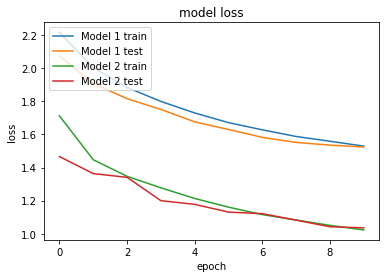

In [10]:
# Classify test set
scoreModelOne = modelOne.evaluate(X_test,Y_test,verbose=1)
print('[Without DA]Test loss:', scoreModelOne[0])
print('[Without DA]Test accuracy (NORMALIZED):', scoreModelOne[1])

print("\n")

scoreModelTwo = modelTwo.evaluate(X_test,Y_test,verbose=1)
print('[Without DA]Test loss:', scoreModelTwo[0])
print('[Without DA]Test accuracy (NORMALIZED):', scoreModelTwo[1])

import matplotlib.pyplot as plt

plt.plot(modelOneHistory.history['loss'])
plt.plot(modelOneHistory.history['val_loss'])
plt.plot(modelTwoHistory.history['loss'])
plt.plot(modelTwoHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Model 1 train', 'Model 1 test', 'Model 2 train', 'Model 2 test'], loc='upper left')
plt.show()


# Conclusões [0.2 pontos]
Escrevam um parágrafo com as conclusões que vocês tiraram na tarefa. Comentem as diferenças entre as duas arquiteturas e em seus treinamentos, apontando a motivação pelas decisões tomadas. Se o resultado ficou melhor/pior do que o que você esperava, o que você acha que pode ter acontecido?

In [10]:
# Write your paragraph here!